In [13]:
import os
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
#analysis = DeepFace.analyze(img_path = 'data/archive/AffectNet/Train/anger/image0021846.jpg', actions = ["age", "gender", "emotion", "race"])
#print(analysis)

In [11]:
def analyze_faces_in_directory(directory):
    # Create a DataFrame to store the analysis results
    results_df = pd.DataFrame(columns=["Image", "Age", "Gender", "Race"])

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
            file_path = os.path.join(directory, filename)
            try:
                # Analyze the face in the image with enforce_detection=False
                print(f"Processing {filename}")
                analysis = DeepFace.analyze(img_path=file_path, actions=['age', 'gender', 'race'], enforce_detection=False)

                # DeepFace returns a list, so access the first dictionary in the list
                analysis = analysis[0]

                # Extract data from the analysis dictionary
                age = analysis.get('age', 'N/A')  # Use .get() to handle missing keys
                gender = analysis.get('dominant_gender', 'N/A')  # Correct key for gender
                race = analysis.get('dominant_race', 'N/A')  # Correct key for race

                # Append results to the DataFrame
                results_df = results_df.append({"Image": filename, "Age": age, "Gender": gender, "Race": race}, ignore_index=True)

                # Print the results for the current image
                print(f"Processed {filename}: Age: {age}, Gender: {gender}, Race: {race}")

            except Exception as e:
                # Handle the error gracefully and continue processing
                print(f"Error processing {filename}: {e}")
                continue

    # Save results to CSV for further use
    results_df.to_csv('face_analysis_results.csv', index=False)
    print("Analysis completed! Results saved to face_analysis_results.csv.")


# Example usage
directory_path = 'data/archive/AffectNet/Train/_test'  
analyze_faces_in_directory(directory_path)


Processing image0021846.jpg


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.19it/s]


Processed image0021846.jpg: Age: 29, Gender: Man, Race: indian
Processing image0021851.jpg


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.69it/s]


Processed image0021851.jpg: Age: 52, Gender: Woman, Race: white
Processing image0021869.jpg


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.12it/s]


Processed image0021869.jpg: Age: 47, Gender: Man, Race: white
Processing image0021894.jpg


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.89it/s]


Processed image0021894.jpg: Age: 23, Gender: Man, Race: latino hispanic
Processing image0021941.jpg


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.00it/s]


Processed image0021941.jpg: Age: 39, Gender: Man, Race: white
Processing image0021955.jpg


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.48it/s]

Processed image0021955.jpg: Age: 35, Gender: Man, Race: latino hispanic
Analysis completed! Results saved to face_analysis_results.csv.


In [12]:
Test_data = pd.read_csv('face_analysis_results.csv')
Test_data

,Image,Age,Gender,Race
0,image0021846.jpg,29,Man,indian
1,image0021851.jpg,52,Woman,white
2,image0021869.jpg,47,Man,white
3,image0021894.jpg,23,Man,latino hispanic
4,image0021941.jpg,39,Man,white
5,image0021955.jpg,35,Man,latino hispanic


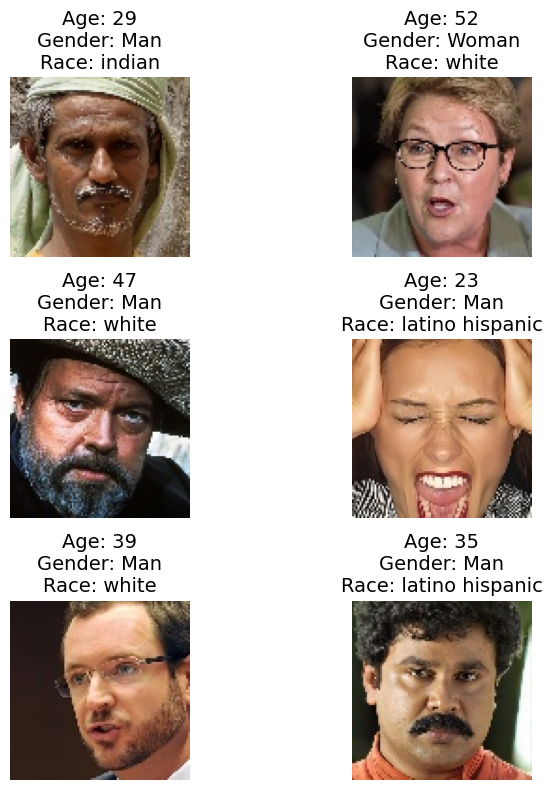

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def display_images_with_labels(df, image_directory):
    # Number of images to display
    num_images = len(df)
    
    # Create a 3x2 grid
    fig, axes = plt.subplots(3, 2, figsize=(8, 8))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= 6:  # Show only 6 images max (for the 3x2 grid)
            break
        
        image_path = os.path.join(image_directory, row['Image'])
        
        # Check if the image file exists
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            
            # Add label for the image
            label = f"Age: {row['Age']}\nGender: {row['Gender']}\nRace: {row['Race']}"
            axes[i].set_title(label, fontsize=14)
        else:
            # If the image doesn't exist, show a placeholder
            axes[i].text(0.5, 0.5, 'Image not found', horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i].axis('off')
    
    # Adjust layout to make space for titles
    plt.tight_layout()
    plt.show()


# Replace with your actual image directory
image_directory = 'data/archive/AffectNet/Train/_test'

# Display the images with labels
display_images_with_labels(Test_data, image_directory)

In [17]:
# Function to add an Age Group column
def add_age_group(df):
    # Define a function to assign age groups
    def get_age_group(age):
        lower_bound = (age // 10) * 10  # Get the lower bound of the age group
        upper_bound = lower_bound + 9  # The upper bound
        return f"{lower_bound}-{upper_bound}"

    # Apply the function to the Age column to create the Age Group column
    df['Age Group'] = df['Age'].apply(get_age_group)
    return df
df_with_age_group = add_age_group(Test_data)

df_with_age_group

,Image,Age,Gender,Race,Age Group
0,image0021846.jpg,29,Man,indian,20-29
1,image0021851.jpg,52,Woman,white,50-59
2,image0021869.jpg,47,Man,white,40-49
3,image0021894.jpg,23,Man,latino hispanic,20-29
4,image0021941.jpg,39,Man,white,30-39
5,image0021955.jpg,35,Man,latino hispanic,30-39
